In [1]:
import pickle

In [2]:
ll -thr

total 1.8G
-rw-rw-r--. 1 horacio   11 May 20 09:47 README.md
-rw-rw-r--. 1 horacio 3.2K May 20 09:47 irisxgb.ipynb
-rw-rw-r--. 1 horacio  54K Jun 10 20:13 signal-bkgnd-xgb-default.ipynb
-rw-rw-r--. 1 horacio  56K Jun 10 20:13 signal-bkgnd-xgb.ipynb
-rw-rw-r--. 1 horacio  54K Jun 10 20:13 titanicxgb-hinge.ipynb
-rw-rw-r--. 1 horacio 243K Jun 10 20:13 titanicxgb-logistic-roc.ipynb
-rw-rw-r--. 1 horacio  55K Jun 10 20:13 titanicxgb-logistic.ipynb
-rw-rw-r--. 1 horacio 7.4K Jun 10 20:13 titanicxgb.ipynb
-rw-rw-r--. 1 horacio 105K Jun 10 20:40 signal_bkgnd_hdata.ipynb
-rw-rw-r--. 1 horacio 2.1M Jun 10 22:36 SignalMC.pkl
-rw-rw-r--. 1 horacio 224K Jun 10 22:36 SignalMCsub.pkl
-rw-rw-r--. 1 horacio 581M Jun 10 22:44 noResonant.pkl
-rw-r--r--. 1 horacio 392K Jun 10 23:04 sidebands_sub.pkl
-rw-rw-r--. 1 horacio 629M Jun 11 00:01 XGBnoResonant.pkl
-rw-r--r--. 1 horacio 6.0K Jun 11 00:07 hepF.py
drwxrwxr-x. 2 horacio   33 Jun 11 00:07 __pycache__/
-rw-rw-r--. 1 horacio 7.4M Jun 11 02:01 FIT.ipynb

In [3]:
import seaborn as sns

In [4]:
import xgboost as xgb
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
ratio=10

In [6]:
signal = pd.read_pickle(str(ratio)+'to1Signal.pkl')
background = pd.read_pickle(str(ratio)+'to1Background.pkl')

In [7]:
signal = signal[['Bpt' ,'kpt' ,'PDL' ,'prob' ,'cosA' ,'signLxy']]

In [8]:
background = background[['Bpt' ,'kpt' ,'PDL' ,'prob' ,'cosA' ,'signLxy']]

In [9]:
len(signal), len(background)

(9090, 90910)

In [10]:
background['signal/bkgnd'] = 0
signal['signal/bkgnd'] = 1

In [11]:
signal

,Bpt,kpt,PDL,prob,cosA,signLxy,signal/bkgnd
454030,20.609999,3.597960,0.011234,0.854232,0.999909,6.789501,1
317085,17.891651,2.444893,0.053647,0.064602,0.999736,39.125755,1
304690,22.844057,4.879606,0.034460,0.805143,0.999994,24.030617,1
314570,12.124928,1.018614,0.026529,0.596536,0.996786,11.045326,1
141944,15.899885,4.121305,0.055482,0.391929,0.999950,25.953213,1
...,...,...,...,...,...,...,...
107767,37.926670,1.882352,0.107336,0.586293,0.999994,100.213333,1
17306,18.671684,2.293047,0.039207,0.681761,0.999771,24.838881,1
593387,11.994792,1.736084,0.011635,0.112062,0.945934,7.176960,1
699547,14.703583,2.348126,0.014600,0.675319,0.998112,8.735790,1


In [12]:
background

,Bpt,kpt,PDL,prob,cosA,signLxy,signal/bkgnd
7436092,4.702267,2.990920,0.004085,0.937610,-0.724065,1.234643,0
12823192,8.202788,1.223805,0.007535,0.028081,0.958881,4.319430,0
12121720,5.537817,1.467153,0.003660,0.109017,0.888617,0.698982,0
7237308,11.910138,1.248530,0.003185,0.001885,0.806550,5.274220,0
7777123,4.360099,1.070293,0.011342,0.416640,0.992848,2.243556,0
...,...,...,...,...,...,...,...
6502497,19.779472,1.211578,0.073391,0.742939,0.999412,17.686764,0
14343563,17.605036,1.187791,0.058159,0.683097,0.990834,8.025740,0
10488131,3.910048,1.347711,0.010071,0.690362,0.954998,1.502752,0
7739960,3.925451,1.050879,0.100794,0.118173,0.999924,9.375487,0


In [13]:
df = background.append(signal)

In [14]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [15]:
#g = sns.pairplot(df[['Bpt','kpt' ,'prob', 'signal/bkgnd']], hue="signal/bkgnd", palette="husl")
#plt.savefig('DataBkg_1.png')

In [16]:
#h = sns.pairplot(df[['signal/bkgnd','PDL' ,'cosA' ,'signLxy']], hue="signal/bkgnd", palette="husl")
#plt.savefig('DataBkg_2.png')

# Labels

In [17]:
#GENERAL DATA
train_x = df.drop(['signal/bkgnd'], axis=1) #features = all minus signal/bkgnd
train_y = df['signal/bkgnd'] #label = signal/bkgnd

In [18]:
#SIGNAL
signal_x = signal.drop(['signal/bkgnd'], axis=1)
signal_y = signal['signal/bkgnd']

In [19]:
#BKGND
bkgnd_x = background.drop(['signal/bkgnd'], axis=1)
bkgnd_y = background['signal/bkgnd']

In [20]:
#SAMPLING DATA
#GENERAL
#train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, 
#                                                  test_size=0.2, 
#                                                  random_state=1)

#SIGNAL
train_signal_x, test_signal_x, train_signal_y, test_signal_y = train_test_split(signal_x, signal_y, 
                                                  test_size=0.5, 
                                                  random_state=1)
#BKGND
train_bkgnd_x, test_bkgnd_x, train_bkgnd_y, test_bkgnd_y = train_test_split(bkgnd_x, bkgnd_y, 
                                                  test_size=0.5, 
                                                  random_state=1)

In [21]:
test_x = test_signal_x.append(test_bkgnd_x)
test_y = test_signal_y.append(test_bkgnd_y)

In [22]:
train_x = train_signal_x.append(train_bkgnd_x)
train_y = train_signal_y.append(train_bkgnd_y)

In [23]:
#XGBClassifier scikit-learn API 
model = xgb.XGBClassifier(objective = 'binary:logistic')
#fit = training
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
### To Save and load the model

In [25]:
pickle.dump(model, open(str(ratio)+"to1_5050.pickle.dat", "wb"))

In [26]:
loaded_model = pickle.load(open(str(ratio)+"to1_5050.pickle.dat", "rb"))

In [27]:
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
### To Save and load the model

In [29]:
#Apliquemos el modelo a los 4 sets 
# Signal y Background (Test - Train)
predict_signal_test =  model.predict_proba(test_signal_x)[:,1]
predict_signal_train =  model.predict_proba(train_signal_x)[:,1]

predict_back_test = model.predict_proba(test_bkgnd_x)[:,1]
predict_back_train = model.predict_proba(train_bkgnd_x)[:,1]


In [30]:
#Compare histograms

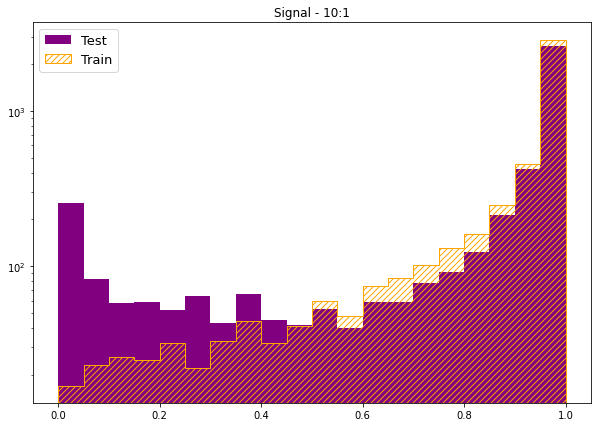

In [31]:
plt.figure(figsize=(10,7))
plt.title('Signal - '+str(ratio)+':1')
m = plt.hist(predict_signal_test, bins=20, label='Test', color='purple')
plt.hist(predict_signal_train, bins=m[1], label='Train', 
         histtype='stepfilled', facecolor='none', edgecolor='orange',
        hatch='////')
plt.legend(fontsize=13)
plt.yscale('log')
plt.savefig('plots/'+str(ratio)+'to1Signal.png')
plt.show()

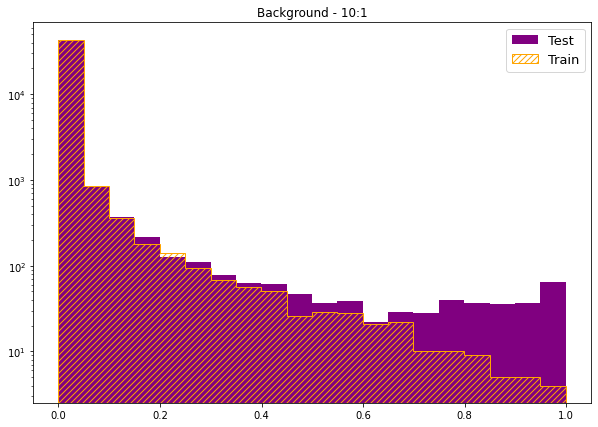

In [32]:
plt.figure(figsize=(10,7))
plt.title('Background - '+str(ratio)+':1')
m = plt.hist(predict_back_test, bins=20, label='Test', color='purple')
plt.hist(predict_back_train, bins=m[1], label='Train', 
         histtype='stepfilled', facecolor='none', edgecolor='orange',
        hatch='////')
plt.legend(fontsize=13)
plt.yscale('log')
plt.savefig('plots/'+str(ratio)+'to1Back.png')
plt.show()

In [33]:
predict_signal = model.predict(test_signal_x)
print(np.round(accuracy_score(test_signal_y,predict_signal)*100, 2),'%')

83.12 %


In [34]:
predict2 = model.predict(test_x)
print(np.round(accuracy_score(test_y,predict2)*100, 2),'%')

97.73 %


In [35]:
predict_prob = model.predict_proba(test_signal_x)
#converting prob values to list
df_prob = pd.DataFrame(predict_prob)
s_prob_signal = df_prob[df_prob.columns[1]] 
list_prob_signal = s_prob_signal.values.tolist()

In [36]:
predict_prob_bkgnd = model.predict_proba(test_bkgnd_x)
df_prob_bkgnd = pd.DataFrame(predict_prob_bkgnd)
s_prob_bkgnd = df_prob_bkgnd[df_prob_bkgnd.columns[1]] 
list_prob_bkgnd = s_prob_bkgnd.values.tolist()

In [37]:
predict_prob_bkgnd[:, 0]+predict_prob_bkgnd[:, 1]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [38]:
len(list_prob_bkgnd)

45455

In [39]:
len(list_prob_signal)

4545

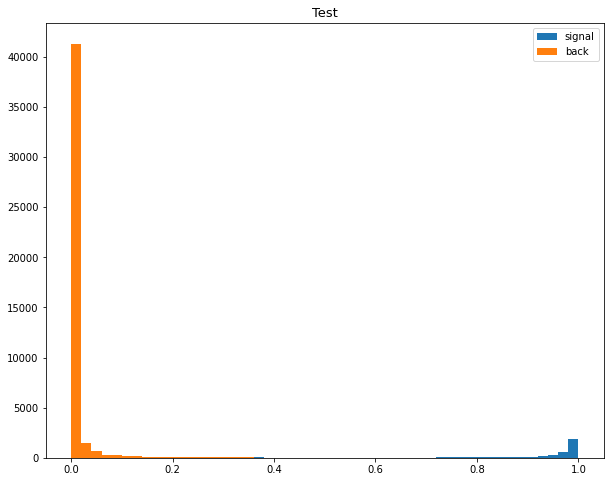

In [40]:
plt.figure(figsize=(10,8))
plt.title('Test', fontsize=13)
m = plt.hist(list_prob_signal, range=(0,1), bins=50, label='signal')
n = plt.hist(list_prob_bkgnd, bins=m[1], label='back')
plt.legend()
plt.show()

(array([44012.,   589.,   236.,   140.,   108.,    76.,    51.,    68.,
           73.,   102.]),
 array([1.60104491e-07, 9.99048303e-02, 1.99809501e-01, 2.99714171e-01,
        3.99618841e-01, 4.99523511e-01, 5.99428181e-01, 6.99332852e-01,
        7.99237522e-01, 8.99142192e-01, 9.99046862e-01]),
 <a list of 10 Patch objects>)

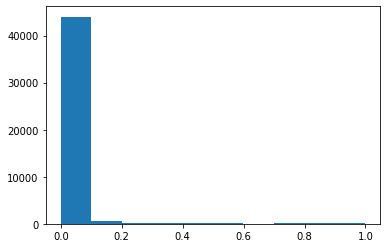

In [41]:
plt.hist(list_prob_bkgnd)

Test :  0.9864816047109055
Train :  0.9988717864196496


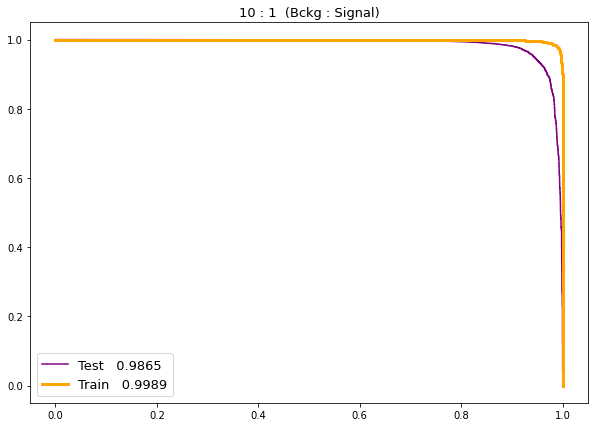

In [42]:
plt.figure(figsize=(10,7))
plt.title(str(ratio)+' : 1  (Bckg : Signal)', fontsize=13)
model_predict = model.predict_proba(test_x)
model_predict = model_predict[:,1]
auc_score = roc_auc_score(test_y, model_predict)
fpr, tpr, _ = roc_curve(test_y, model_predict)
print('Test : ', auc_score)
plt.plot(tpr, 1-fpr, label='Test   '+ str(round(auc_score, 4)), color='purple')
model_predict = model.predict_proba(train_x)
model_predict = model_predict[:,1]
auc_score = roc_auc_score(train_y, model_predict)
fpr, tpr, _ = roc_curve(train_y, model_predict)
plt.plot(tpr, 1-fpr, label='Train   ' + str(round(auc_score,4)) , color='orange', linewidth=3)
print('Train : ', auc_score)
plt.legend(fontsize=13)
plt.savefig('plots/'+str(ratio)+'to1roc.png')
plt.show()

# $B^{+-} \to K^{+-} \mu \mu$

In [43]:
ll

total 1852912
-rw-rw-r--. 1 horacio    258721 Jun 12 01:13 10to1_5050.pickle.dat
-rw-rw-r--. 1 horacio   4364540 Jun 11 19:42 10to1Background.pkl
-rw-rw-r--. 1 horacio    437168 Jun 11 19:47 10to1Signal.pkl
-rw-rw-r--. 1 horacio    286657 Jun 12 00:50 2to1_5050.pickle.dat
-rw-rw-r--. 1 horacio   3200876 Jun 11 19:42 2to1Background.pkl
-rw-rw-r--. 1 horacio     16344 Jun 12 00:51 2to1Cuts0.png
-rw-rw-r--. 1 horacio     15161 Jun 12 00:51 2to1Cuts1.png
-rw-rw-r--. 1 horacio   1600832 Jun 11 19:47 2to1Signal.pkl
-rw-rw-r--. 1 horacio    269305 Jun 12 01:10 5to1_5050.pickle.dat
-rw-rw-r--. 1 horacio   4000892 Jun 11 19:42 5to1Background.pkl
-rw-rw-r--. 1 horacio    800816 Jun 11 19:47 5to1Signal.pkl
-rw-r--r--. 1 horacio    126150 Jun 11 19:43 CleanData.ipynb
-rw-r--r--. 1 horacio    107047 Jun 11 19:48 CleanMC.ipynb
-rw-rw-r--. 1 horacio     21578 Jun 12 00:54 CompareSBRatios.ipynb
-rw-rw-r--. 1 horacio    113666 Jun 11 23:26 DataBkg_1.png
-rw-rw-r--. 1 horacio     49767 Jun 11 23:26 Data

In [44]:
noResonant = pd.read_pickle('noResonant.pkl')

In [45]:
noResonant_x = noResonant[['Bpt' ,'kpt', 'PDL', 'prob' ,'cosA' ,'signLxy']]

In [46]:
predic = model.predict_proba(noResonant_x)

In [47]:
noResonant['XGBoost'] = predic[:,1]

In [61]:
pd.to_pickle(noResonant, 'XGBnoResonant.pkl')

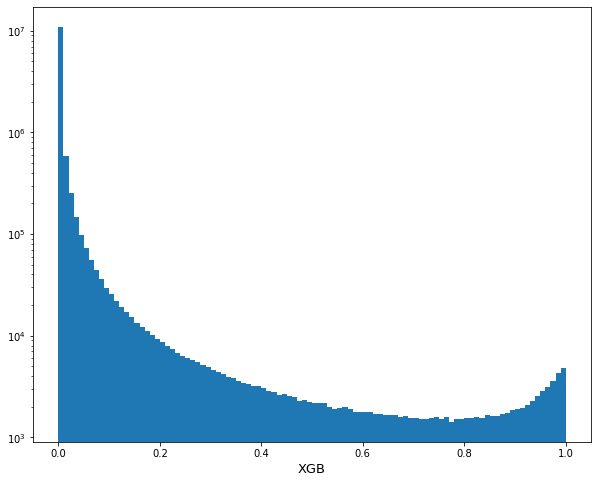

In [49]:
plt.figure(figsize=(10,8))
plt.hist(noResonant.XGBoost, bins=100)
plt.yscale('log')
plt.xlabel('XGB', fontsize=13)
plt.show()

In [50]:
XGB_50 = noResonant[noResonant.XGBoost>0.5]
XGB_80 = noResonant[noResonant.XGBoost>0.8]
XGB_90 = noResonant[noResonant.XGBoost>0.9]
XGB_95 = noResonant[noResonant.XGBoost>0.95]
XGB_96 = noResonant[noResonant.XGBoost>0.96]
XGB_97 = noResonant[noResonant.XGBoost>0.97]
XGB_98 = noResonant[noResonant.XGBoost>0.98]
XGB_99 = noResonant[noResonant.XGBoost>0.99]

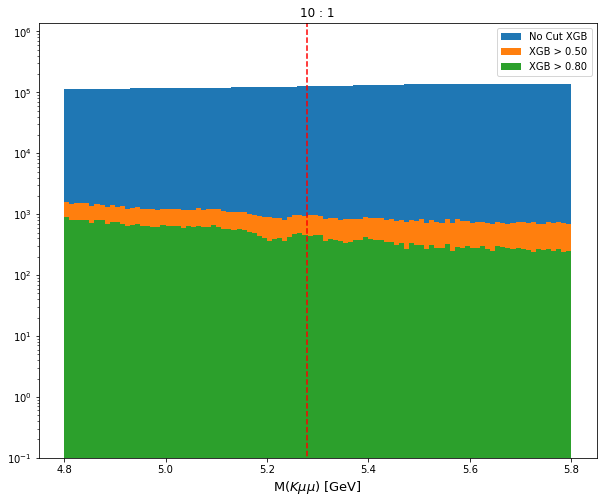

In [51]:
plt.figure(figsize=(10,8))
plt.title(str(ratio)+' : 1')
m = plt.hist(noResonant.BMass, range=(4.8,5.8), bins=100, label='No Cut XGB')
plt.hist(XGB_50.BMass, range=(4.8,5.8), bins=100, label='XGB > 0.50')
plt.hist(XGB_80.BMass, range=(4.8,5.8), bins=100, label='XGB > 0.80')
plt.plot([5.279, 5.279],[0, max(m[0])*13], color='r', ls='--')
plt.yscale('log')
plt.ylim(0.1, max(m[0])*10)
plt.xlabel(r'M($K\mu\mu$) [GeV]', fontsize=13)
plt.legend()
plt.savefig('plots/'+str(ratio)+'to1Cuts0.png')
plt.show()

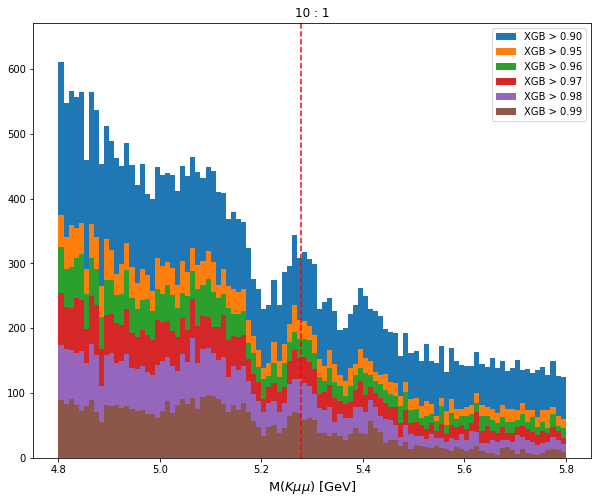

In [52]:
plt.figure(figsize=(10,8))
#m = plt.hist(XGB_50.BMass, range=(4.8,5.8), bins=100)
#plt.hist(XGB_80.BMass, range=(4.8,5.8), bins=100)
plt.title(str(ratio)+' : 1')
m0 = plt.hist(XGB_90.BMass, range=(4.8,5.8), bins=100,label='XGB > 0.90')
m1 = plt.hist(XGB_95.BMass, range=(4.8,5.8), bins=100, label='XGB > 0.95')
m = plt.hist(XGB_96.BMass, range=(4.8,5.8), bins=100, label='XGB > 0.96')
plt.hist(XGB_97.BMass, range=(4.8,5.8), bins=100, label='XGB > 0.97')
plt.hist(XGB_98.BMass, range=(4.8,5.8), bins=100, label='XGB > 0.98')
plt.hist(XGB_99.BMass, range=(4.8,5.8), bins=100, label='XGB > 0.99')
plt.plot([5.279, 5.279],[0, max(m0[0])*1.3], color='r', ls='--')
plt.ylim(0, max(m0[0])*1.1)
plt.xlabel(r'M($K\mu\mu$) [GeV]', fontsize=13)
plt.savefig('plots/'+str(ratio)+'to1Cuts1.png')
plt.legend()
plt.show()

In [53]:
histBmass = np.histogram(XGB_95.BMass, range=(5.2,5.4), bins=20)

In [54]:
histBmass[0]

array([139, 147, 178, 150, 175, 207, 235, 212, 211, 204, 189, 152, 142,
       166, 145, 128, 118, 139, 144, 168])

In [55]:
histBmass[1]

array([5.2 , 5.21, 5.22, 5.23, 5.24, 5.25, 5.26, 5.27, 5.28, 5.29, 5.3 ,
       5.31, 5.32, 5.33, 5.34, 5.35, 5.36, 5.37, 5.38, 5.39, 5.4 ],
      dtype=float32)

In [56]:
(histBmass[1][1:]+histBmass[1][:-1])/2

array([5.205    , 5.215    , 5.225    , 5.2349997, 5.245    , 5.255    ,
       5.2650003, 5.275    , 5.285    , 5.295    , 5.3050003, 5.315    ,
       5.325    , 5.335    , 5.3450003, 5.355    , 5.365    , 5.375    ,
       5.385    , 5.395    ], dtype=float32)

(0.0, 258.5)

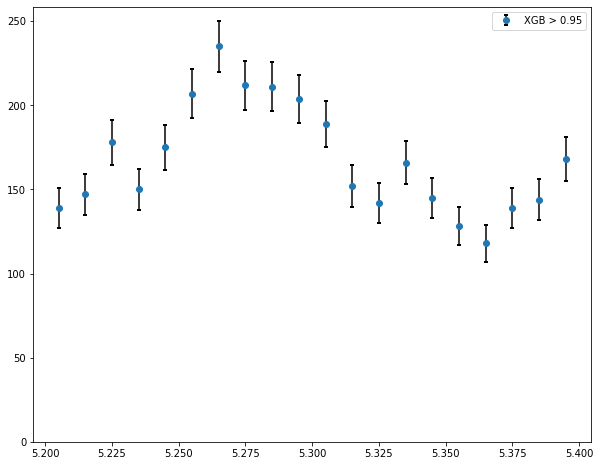

In [57]:
plt.figure(figsize=(10,8))
plt.errorbar(x = (histBmass[1][1:]+histBmass[1][:-1])/2,
             y = histBmass[0],
             yerr = np.sqrt(histBmass[0]),
            #fmt='none', barsabove=True,
            #marker='s', markersize=10,
            fmt='o', ecolor='black',capsize=2, capthick=2, label='XGB > 0.95')
plt.legend()
plt.ylim(0, max(histBmass[0])*1.1)

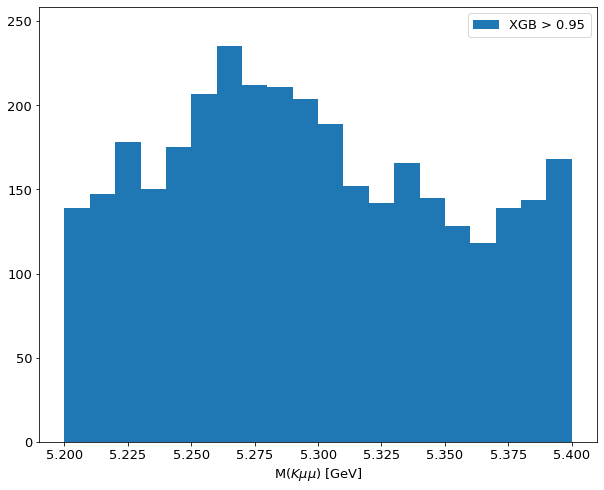

In [58]:
plt.figure(figsize=(10,8))

m1 = plt.hist(XGB_95.BMass, range=(5.2,5.4), bins=20, label='XGB > 0.95')
plt.ylim(0, max(m1[0])*1.1)
plt.xlabel(r'M($K\mu\mu$) [GeV]', fontsize=13)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend(fontsize=13)
plt.show()

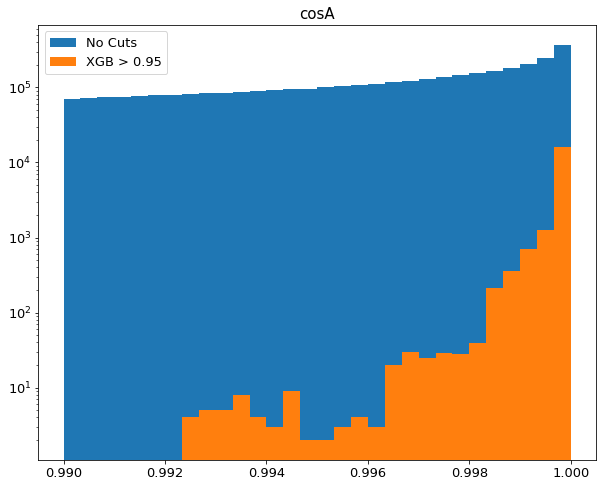

In [59]:

plt.figure(figsize=(10,8))
plt.title('cosA', fontsize=15)
range_ = (0.99, 1)
m = plt.hist(noResonant.cosA,range=range_ ,bins=30, label='No Cuts')
plt.hist(XGB_95.cosA, bins=m[1], label='XGB > 0.95')
plt.yscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

plt.show()

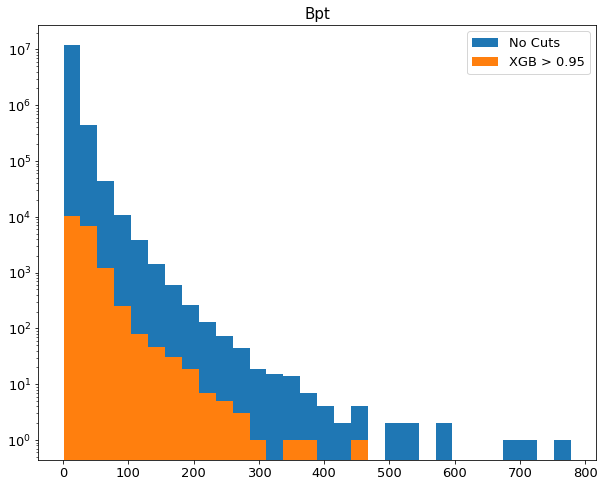

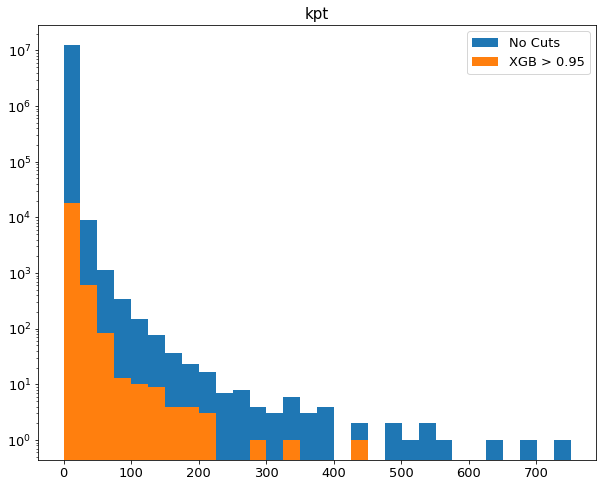

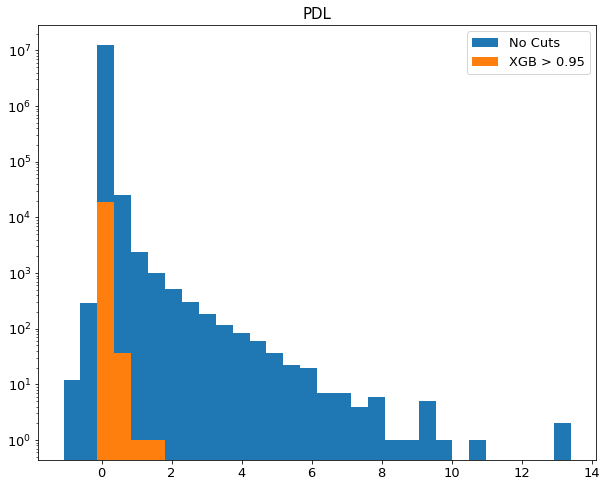

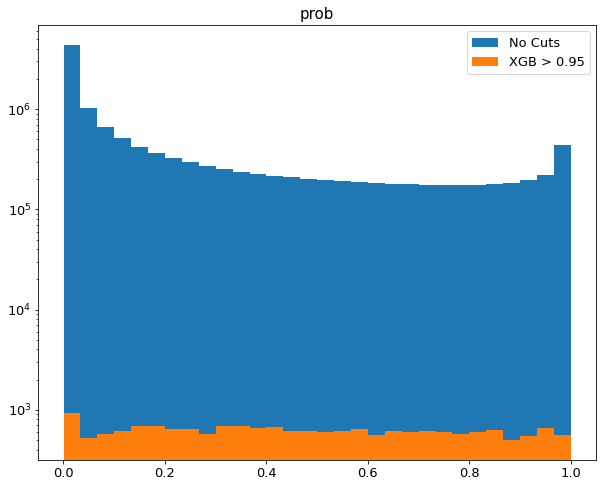

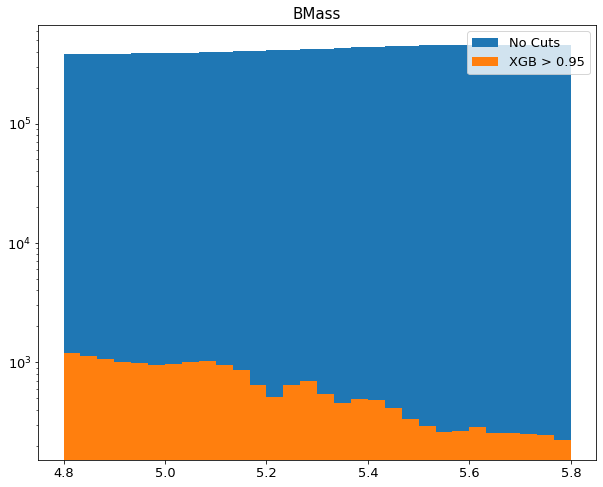

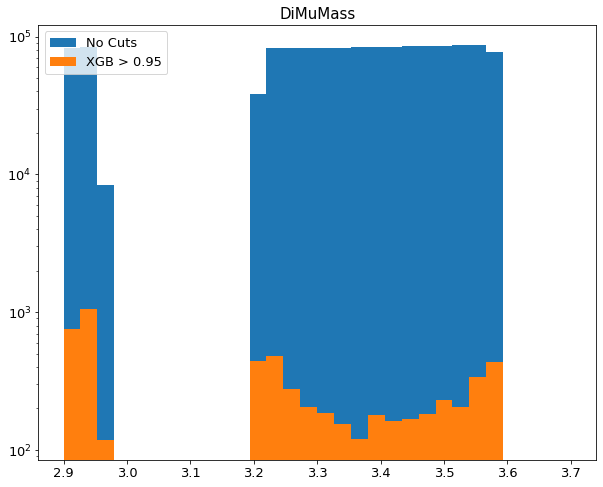

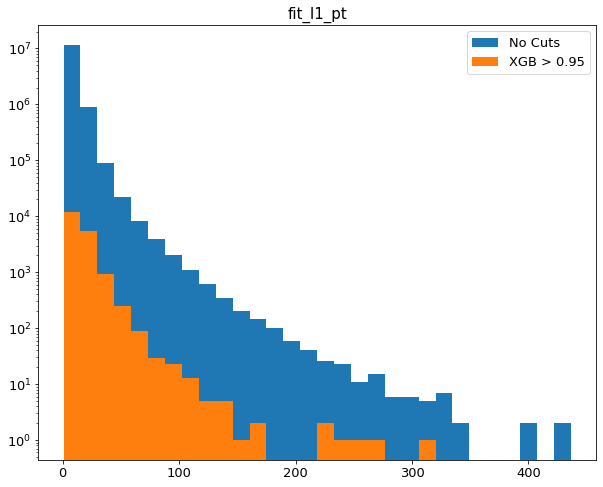

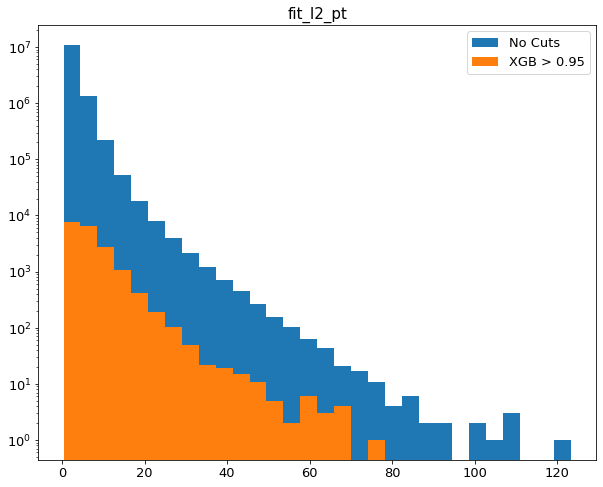

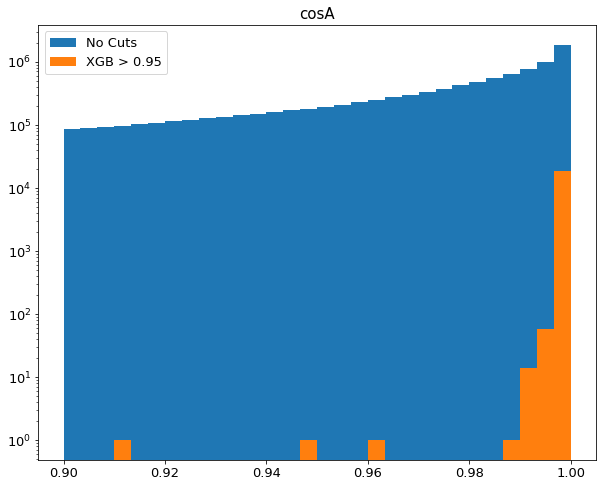

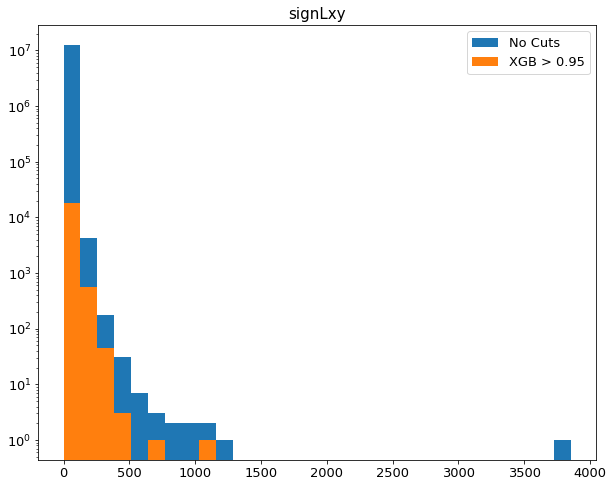

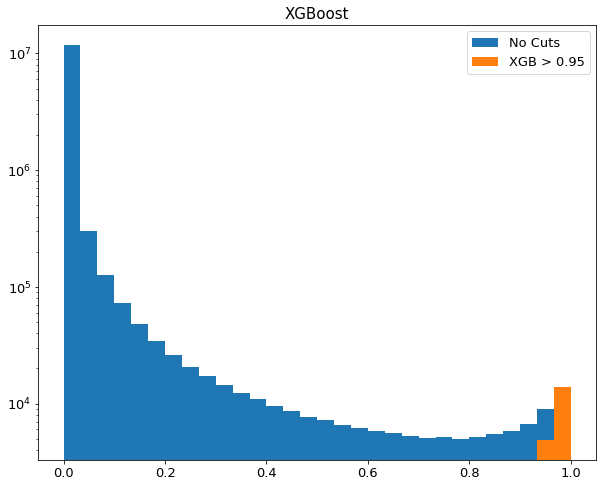

In [60]:
for k in XGB_95:
   
    plt.figure(figsize=(10,8))
    plt.title(k, fontsize=15)
    if k == 'BMass':
        range_ = (4.8, 5.8)
    elif k=='cosA':
        range_ = (0.9, 1)
    elif k in 'DiMuMass':
        range_=(2.9, 3.7)
    else:
        range_ = (np.min(noResonant[k]), np.max(noResonant[k]))
    m = plt.hist(noResonant[k],range=range_ ,bins=30, label='No Cuts')
    plt.hist(XGB_95[k], bins=m[1], label='XGB > 0.95')
    plt.yscale('log')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(fontsize=13)
    
    plt.show()